# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BIKE DEMAND PREDICTION</p>

![image.jpg](https://i.ibb.co/c2rq4rT/Bike-Sharing.png)

[](https://thinkingneuron.com/bike-rental-demand-prediction-case-study-in-python/)

Free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So I handled as a time series problem with ***Bidirectional LSTM***

Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

## Eda and Visualization


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [ ]:
df = pd.read_csv("store_sharing.csv", parse_dates=['timestamp'], index_col="timestamp")

In [ ]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.000,1.000,81.000,19.000,3.000,0.000,0.000,3.000
2017-01-03 20:00:00,541,5.000,1.000,81.000,21.000,4.000,0.000,0.000,3.000
2017-01-03 21:00:00,337,5.500,1.500,78.500,24.000,4.000,0.000,0.000,3.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [ ]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.000,1143.102,1085.108,0.000,257.000,844.000,1671.750,7860.000
t1,17414.000,12.468,5.572,-1.500,8.000,12.500,16.000,34.000
t2,17414.000,11.521,6.615,-6.000,6.000,12.500,16.000,34.000
hum,17414.000,72.325,14.313,20.500,63.000,74.500,83.000,100.000
wind_speed,17414.000,15.913,7.895,0.000,10.000,15.000,20.500,56.500
weather_code,17414.000,2.723,2.341,1.000,1.000,2.000,3.000,26.000
is_holiday,17414.000,0.022,0.147,0.000,0.000,0.000,0.000,1.000
is_weekend,17414.000,0.285,0.452,0.000,0.000,0.000,1.000,1.000
season,17414.000,1.492,1.119,0.000,0.000,1.000,2.000,3.000


In [ ]:
def boxplotit(data,x=3,y=3,drops=[]):
    index = 0
    plt.figure(figsize=(x*6, y*4))
    for feature in df.drop(drops,axis=1).columns:
        index += 1
        plt.subplot(x,y,index)
        sns.boxplot(x=feature, data=df, whis=1.5)

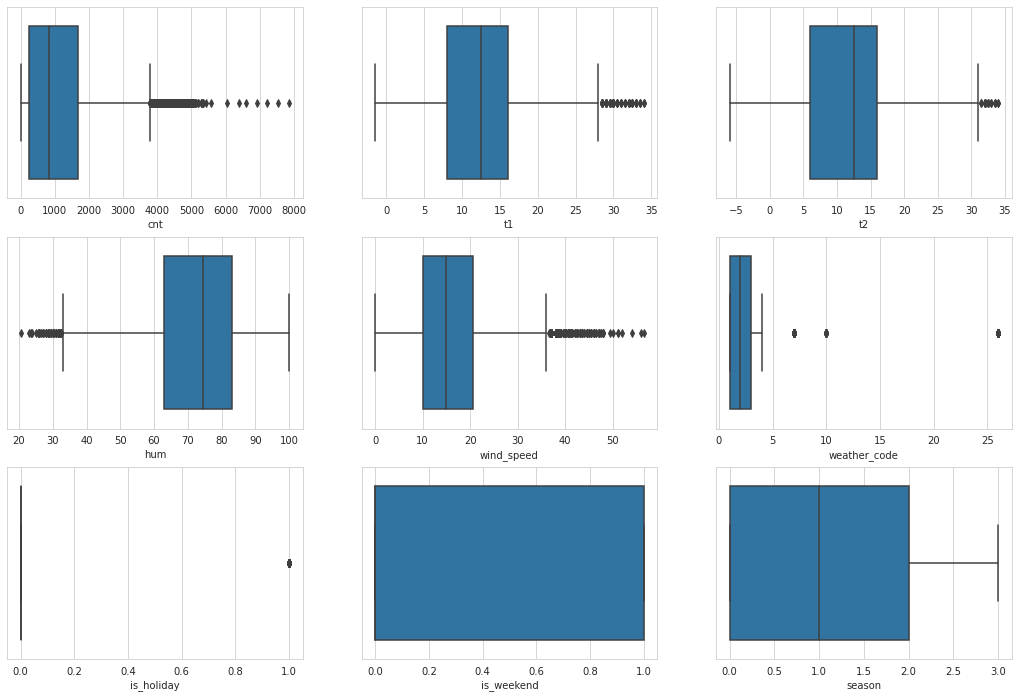

In [ ]:
boxplotit(df)

In [ ]:
#df["timestamp"] = pd.to_datetime(df["timestamp"])

In [ ]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour 
df["date"] = df.index.date

In [ ]:
df.sample(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,dayofweek,hour,date
timestamp,,,,,,,,,,,,,,,
2015-02-19 08:00:00,3559,7.000,4.000,76.000,18.500,2.000,0.000,0.000,3.000,2015,2,19,3,8,2015-02-19
2016-07-02 14:00:00,2817,18.500,18.500,52.000,27.000,2.000,0.000,1.000,1.000,2016,7,2,5,14,2016-07-02
2016-07-18 07:00:00,2448,19.500,19.500,71.000,6.500,1.000,0.000,0.000,1.000,2016,7,18,0,7,2016-07-18
2016-06-18 06:00:00,170,14.000,14.000,82.000,11.000,3.000,0.000,1.000,1.000,2016,6,18,5,6,2016-06-18
2015-04-02 23:00:00,345,8.500,6.500,73.500,11.000,7.000,0.000,0.000,0.000,2015,4,2,3,23,2015-04-02


In [ ]:
df['season_name'] = df['season'].replace({0:"Spring", 1:"Summer", 2:"Autumn", 3:"Winter"})

In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,dayofweek,hour,date,season_name
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015,1,4,6,0,2015-01-04,Winter
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015,1,4,6,1,2015-01-04,Winter
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015,1,4,6,2,2015-01-04,Winter
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015,1,4,6,3,2015-01-04,Winter
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015,1,4,6,4,2015-01-04,Winter


Text(0.5, 1.0, 'Bike shares over time')

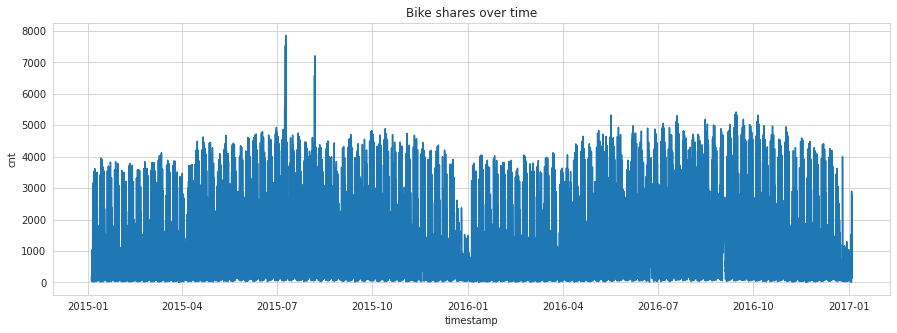

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index, "cnt", data=df)
plt.title("Bike shares over time")

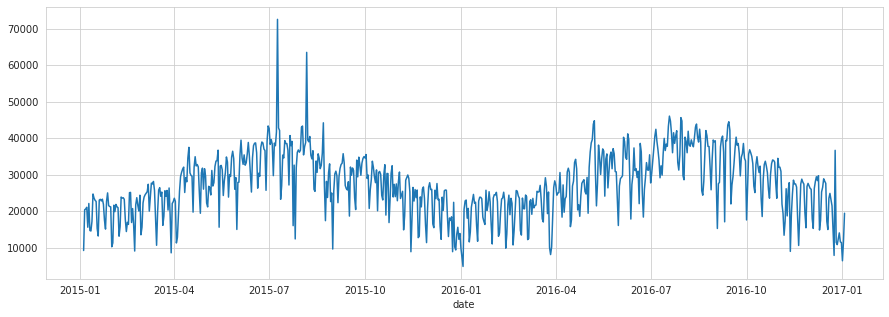

In [ ]:
plt.figure(figsize=(15,5))
df.groupby('date')['cnt'].sum().plot();

Text(0.5, 1.0, 'Bike shares by months')

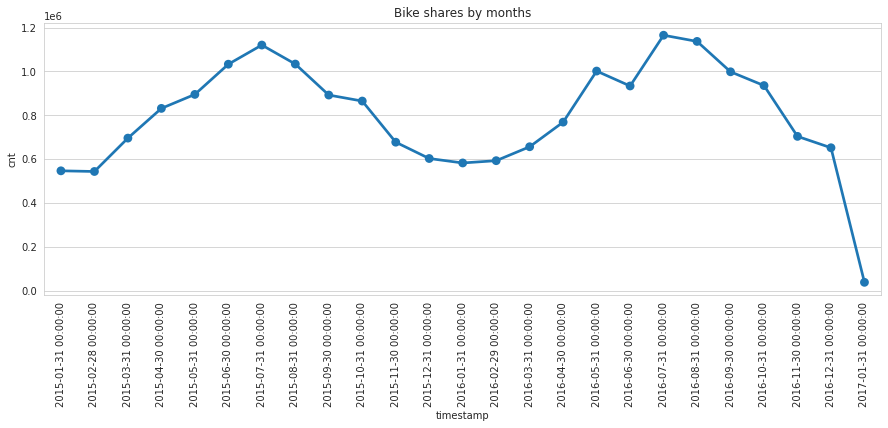

In [ ]:
data_by_month = df.resample('M').sum()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.pointplot(x=data_by_month.index, y=data_by_month.cnt)
plt.title("Bike shares by months")

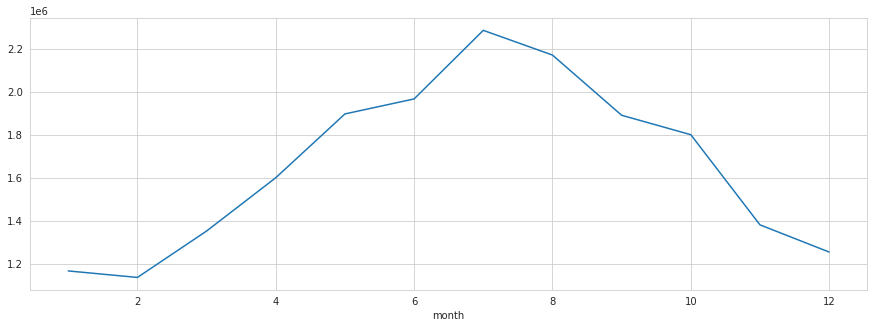

In [ ]:
plt.figure(figsize=(15,5))
df.groupby('month')['cnt'].sum().plot();

In [ ]:
year_month_cnt = df.groupby(["year", "month"])["cnt"].mean()
year_month_cnt.index.levels[0]  

Int64Index([2015, 2016, 2017], dtype='int64', name='year')

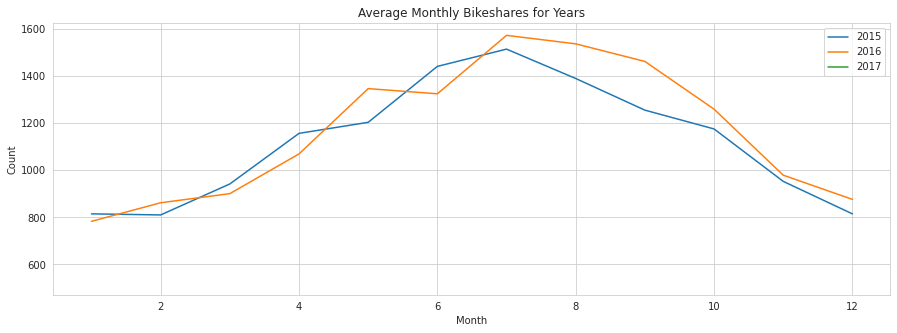

In [ ]:
year_month_cnt = df.groupby(["year", "month"])["cnt"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

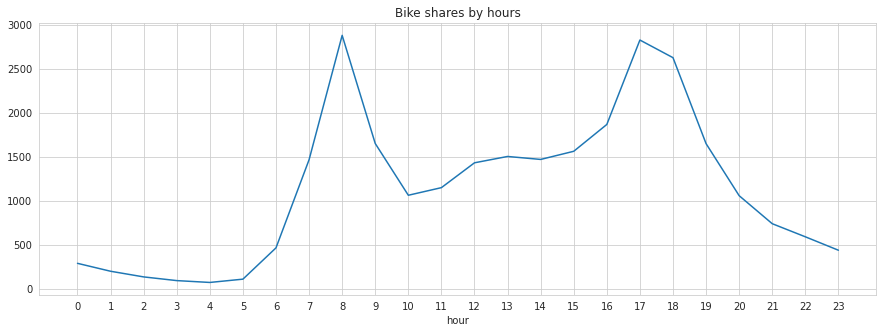

In [ ]:
hour_cnt = df.groupby("hour")["cnt"].mean()
plt.figure(figsize=(15,5))
plt.xticks(np.arange(24))
sns.lineplot(hour_cnt.index, hour_cnt.values)
plt.title("Bike shares by hours");

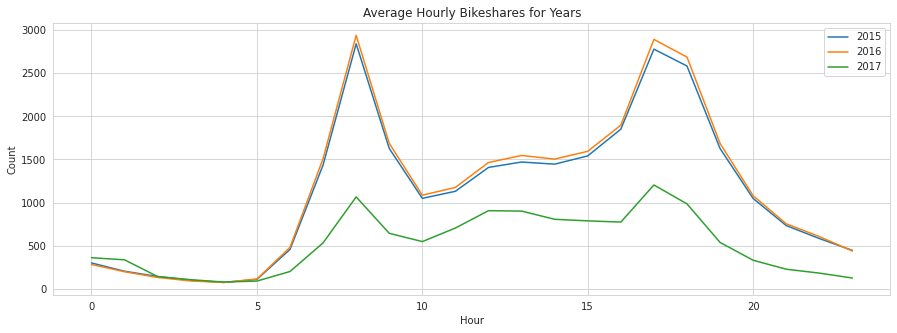

In [ ]:
year_hour_cnt = df.groupby(["year", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_hour_cnt[year].index, year_hour_cnt[year],label=year)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Years')
plt.show()

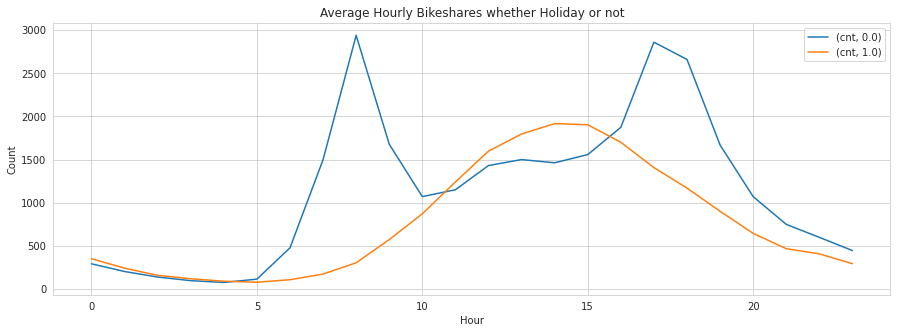

In [ ]:
df.groupby(["hour","is_holiday"]).agg({"cnt" :"mean"}).unstack(level=1).plot.line(figsize=(15,5)) # star code

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Holiday or not')
plt.show()

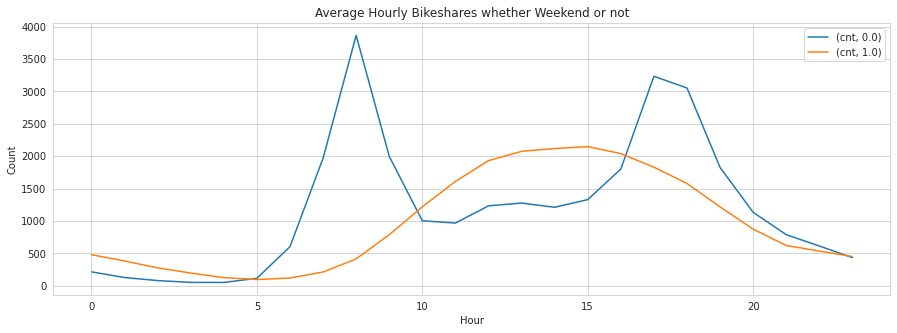

In [ ]:
df.groupby(["hour","is_weekend"]).agg({"cnt" :"mean"}).unstack(level=1).plot.line(figsize=(15,5)) 

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Weekend or not')
plt.show()

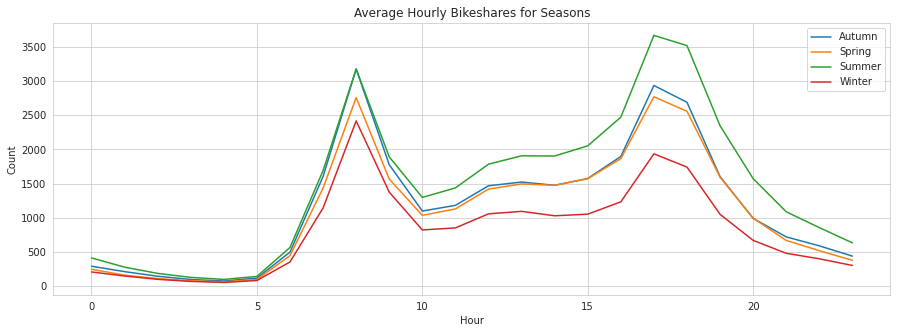

In [ ]:
season_hour_cnt = df.groupby(["season_name", "hour"])["cnt"].mean()
#df.groupby(["season_name", "hour"]).agg({"mean"}).unstack(level=0).plot.line(figsize=(15,5)) legend olmadı.

plt.figure(figsize=(15,5))
for season in season_hour_cnt.index.levels[0]:
    plt.plot(season_hour_cnt[season].index, season_hour_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Seasons')
plt.show()

Text(0.5, 1.0, 'bike shares by day of week')

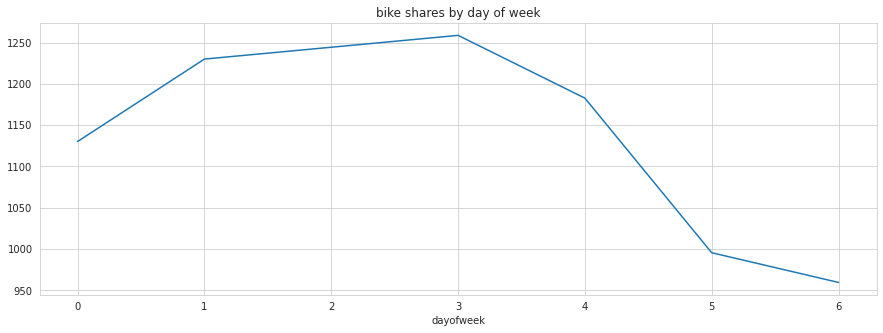

In [ ]:
plt.figure(figsize=(15,5))
df.groupby('dayofweek')['cnt'].mean().plot()
plt.title("bike shares by day of week")

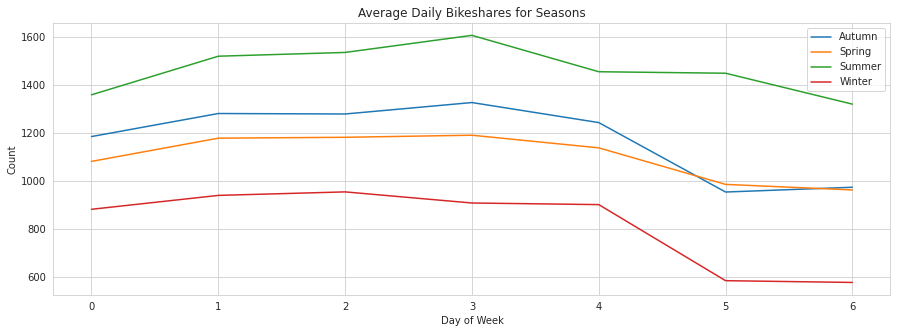

In [ ]:
season_dayofweek_cnt = df.groupby(["season_name", "dayofweek"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_dayofweek_cnt.index.levels[0]:
    plt.plot(season_dayofweek_cnt[season].index, season_dayofweek_cnt[season],label=season)

plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Daily Bikeshares for Seasons')
plt.show()

In [ ]:
df_holiday=df[df['is_holiday']==1]

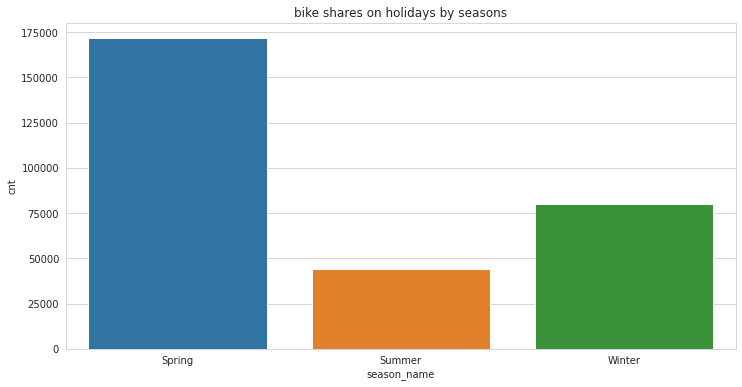

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='season_name', y='cnt', data=df_holiday, ci=None, estimator=sum)
plt.title("bike shares on holidays by seasons");

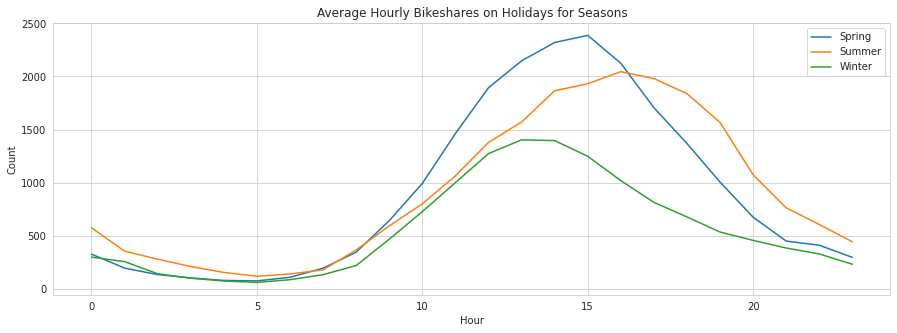

In [ ]:
season_holiday_cnt = df_holiday.groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_holiday_cnt.index.levels[0]:
    plt.plot(season_holiday_cnt[season].index, season_holiday_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Holidays for Seasons')
plt.show()

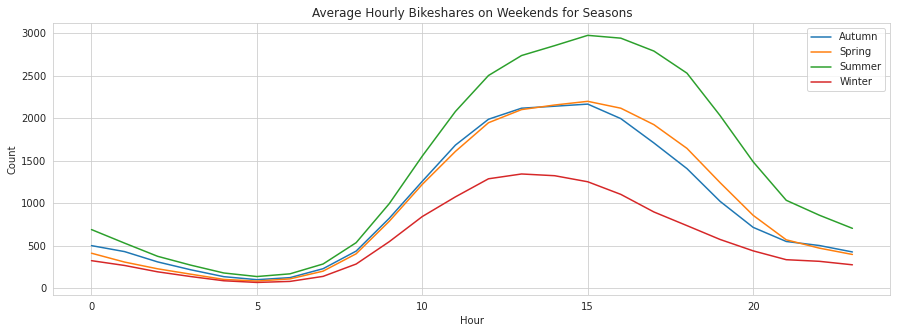

In [ ]:
season_weekend_cnt = df[df["is_weekend"]==1].groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_weekend_cnt.index.levels[0]:
    plt.plot(season_weekend_cnt[season].index, season_weekend_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Weekends for Seasons')
plt.show()

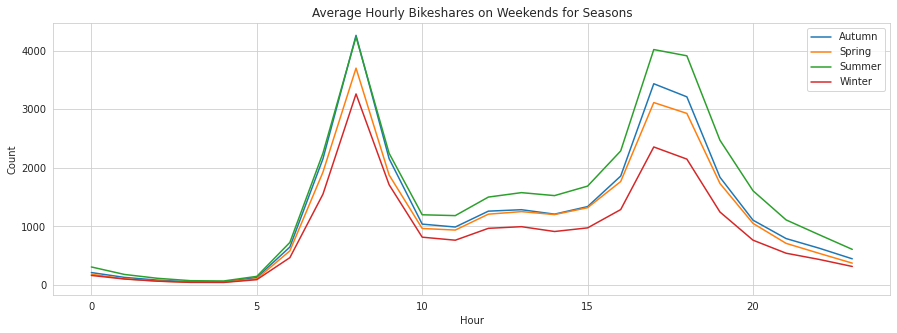

In [ ]:
season_weekend_cnt = df[df["is_weekend"]==0].groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_weekend_cnt.index.levels[0]:
    plt.plot(season_weekend_cnt[season].index, season_weekend_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Hourly Bikeshares on Weekends for Seasons')
plt.show()

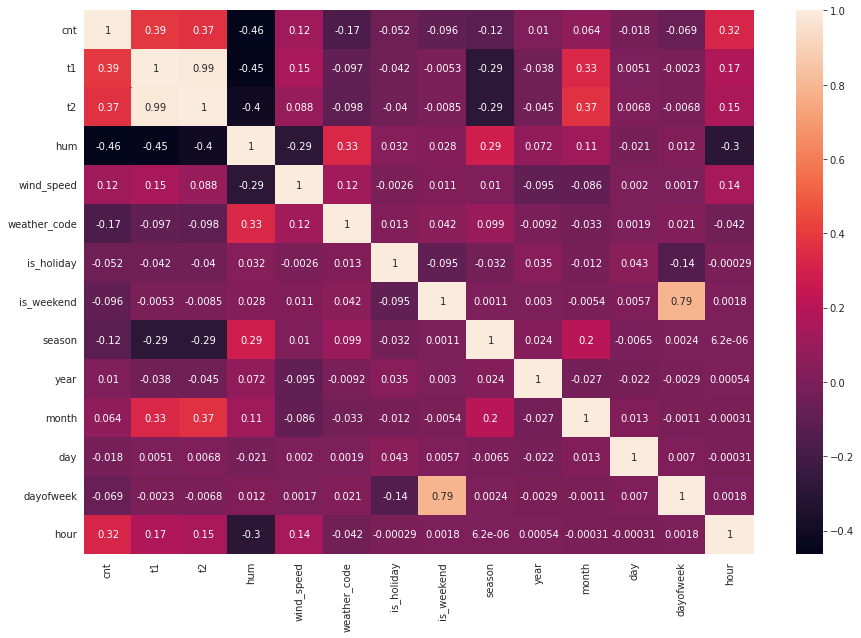

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

In [ ]:
abs(df.corr()['cnt']).sort_values(ascending=False)

In [ ]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,dayofweek,hour,date,season_name
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,2.000,93.000,6.000,3.000,0.000,1.000,3.000,2015,1,4,6,0,2015-01-04,Winter
2015-01-04 01:00:00,138,3.000,2.500,93.000,5.000,1.000,0.000,1.000,3.000,2015,1,4,6,1,2015-01-04,Winter
2015-01-04 02:00:00,134,2.500,2.500,96.500,0.000,1.000,0.000,1.000,3.000,2015,1,4,6,2,2015-01-04,Winter
2015-01-04 03:00:00,72,2.000,2.000,100.000,0.000,1.000,0.000,1.000,3.000,2015,1,4,6,3,2015-01-04,Winter
2015-01-04 04:00:00,47,2.000,0.000,93.000,6.500,1.000,0.000,1.000,3.000,2015,1,4,6,4,2015-01-04,Winter


In [ ]:
df.weather_code.value_counts()

1.000     6150
2.000     4034
3.000     3551
7.000     2141
4.000     1464
26.000      60
10.000      14
Name: weather_code, dtype: int64

In [ ]:
df2 = df.drop(["t2", "date", "year", "season_name", "season", "month", "dayofweek", "day", "hour"], axis=1)
#these are not very effective on model.I selected the strongest correlated ones.I will use timestamp column,so other date info are unneccessary now.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   hum           17414 non-null  float64
 3   wind_speed    17414 non-null  float64
 4   weather_code  17414 non-null  float64
 5   is_holiday    17414 non-null  float64
 6   is_weekend    17414 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.6 MB


## 2. Pre-Model


### Train - Test Split

In [ ]:
weather_dummy = pd.get_dummies(df2['weather_code'].astype("str"), prefix="w_code", drop_first=True)
df_dummy = pd.concat([df2, weather_dummy],axis=1).drop(["weather_code"],axis=1)
df_dummy.head()

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,w_code_10.0,w_code_2.0,w_code_26.0,w_code_3.0,w_code_4.0,w_code_7.0
timestamp,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.000,93.000,6.000,0.000,1.000,0,0,0,1,0,0
2015-01-04 01:00:00,138,3.000,93.000,5.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 02:00:00,134,2.500,96.500,0.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 03:00:00,72,2.000,100.000,0.000,0.000,1.000,0,0,0,0,0,0
2015-01-04 04:00:00,47,2.000,93.000,6.500,0.000,1.000,0,0,0,0,0,0


In [ ]:
df_dummy.shape

(17414, 12)

In [ ]:
train_size = int(len(df_dummy) * 0.9)
test_size = len(df_dummy) - train_size

train, test = df_dummy.iloc[0:train_size], df_dummy.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** * Scale only 't1'/'t2', 'hum', 'wind_speed' variables.Need to scale the dependent and independent variables separately. Both train data and test data.*

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()  #RS kullandım çalışmadı.önce değişkene ata.sonra fit.sonra transform ayrı.fit traine, transform test ve traine.
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.


In [ ]:
def create_dataset(x, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count "cnt" value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    xs, ys = [], []
    for i in range(len(x) - time_steps):
        v = x.iloc[i:(i + time_steps)].values
        xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(xs), np.array(ys) #x = np.asarray(x).astype('float32').

In [ ]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

x_train, y_train = create_dataset(train, train.cnt, time_steps)
x_test, y_test = create_dataset(test, test.cnt, time_steps)

print(x_train.shape, y_train.shape)

(15648, 24, 12) (15648,)


## 3. Model Building with LSTM


----Long short-term memory is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network can process not only single data points, but also entire sequences of data.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(units=128, input_shape=(x_train.shape[1], x_train.shape[2]))))

model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5) 

Early stopping is an optimization technique used to reduce overfitting without compromising on model accuracy. The main idea behind early stopping is to stop training before a model starts to overfit.

In [ ]:
model.fit(x_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
343/343 [==============================] - 27s 67ms/step - loss: 0.1458 - val_loss: 0.1017
Epoch 2/30
343/343 [==============================] - 26s 76ms/step - loss: 0.0587 - val_loss: 0.0721
Epoch 3/30
343/343 [==============================] - 28s 82ms/step - loss: 0.0397 - val_loss: 0.0563
Epoch 4/30
343/343 [==============================] - 32s 95ms/step - loss: 0.0331 - val_loss: 0.0469
Epoch 5/30
343/343 [==============================] - 22s 64ms/step - loss: 0.0275 - val_loss: 0.0440
Epoch 6/30
343/343 [==============================] - 22s 65ms/step - loss: 0.0256 - val_loss: 0.0382
Epoch 7/30
343/343 [==============================] - 22s 65ms/step - loss: 0.0233 - val_loss: 0.0372
Epoch 8/30
343/343 [==============================] - 23s 67ms/step - loss: 0.0213 - val_loss: 0.0360
Epoch 9/30
343/343 [==============================] - 24s 69ms/step - loss: 0.0215 - val_loss: 0.0338
Epoch 10/30
343/343 [==============================] - 22s 65ms/step - loss: 0.020

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 256)              144384    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 144,641
Trainable params: 144,641
Non-trainable params: 0
_________________________________________________________________


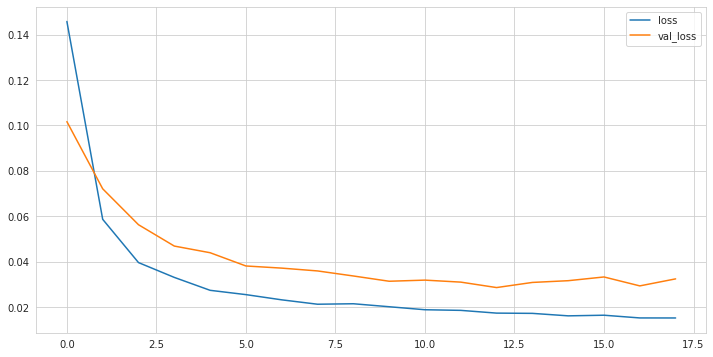

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## 4. Test

In [ ]:
y_pred = model.predict(x_test)

54/54 [==============================] - 2s 19ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [ ]:
eval_metrics(y_test, y_pred)

r2_score: 0.9633146750474769 
 mae: 0.08030855218718812 
 mse: 0.01505060046538016 
 rmse: 0.12268088875362845


### Inverse Transform

In [ ]:
#x = np.arange(0,50)

In [ ]:
#x = x.reshape(1,-1)

In [ ]:
#Robust Scaler geri döndürme.
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

In [ ]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index

In [ ]:
pred_test

,test,prediction
timestamp,,
2016-10-24 08:00:00,3985.000,3770.818
2016-10-24 09:00:00,2070.000,1871.351
2016-10-24 10:00:00,968.000,990.880
2016-10-24 11:00:00,965.000,846.462
2016-10-24 12:00:00,1180.000,1145.837
...,...,...
2017-01-03 19:00:00,1042.000,1137.170
2017-01-03 20:00:00,541.000,590.863
2017-01-03 21:00:00,337.000,360.225


In [ ]:
eval_metrics(y_test_inv.flatten(), y_pred_inv.flatten())

r2_score: 0.9633146743853043 
 mae: 116.60801860200928 
 mse: 31731.24173631395 
 rmse: 178.13265207792185


### Plot Prediction

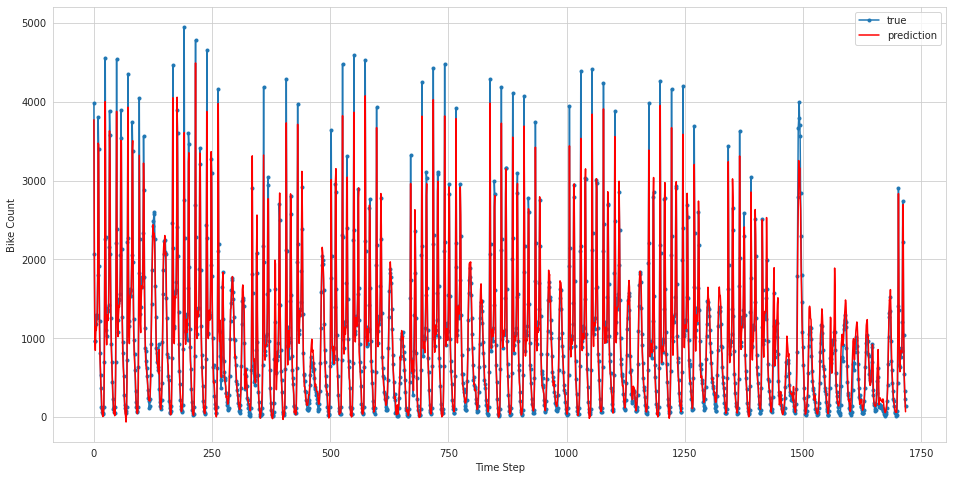

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();